<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
import wget


In [3]:
import subprocess

def runcmd(cmd, verbose = False, *args, **kwargs):

    process = subprocess.Popen(
        cmd,
        stdout = subprocess.PIPE,
        stderr = subprocess.PIPE,
        text = True,
        shell = True
    )
    std_out, std_err = process.communicate()
    if verbose:
        print(std_out.strip(), std_err)
    pass

In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-01-18 20:07:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.3'

     0K .......... .......... .......... .......... ..........  0%  173K 3m27s
    50K .......... .......... .......... .......... ..........  0%  272K 2m49s
   100K .......... .......... .......... .......... ..........  0%  410K 2m22s
   150K .......... .......... .......... .......... ..........  0%  281K 2m18s
   200K .......... .......... .......... .......... ..........  0%  615K 2m2s
   2

Connect to the database.


In [5]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [6]:
import pandas as pd

## Demo: How to run an sql query


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [10]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [11]:
# your code goes here
import matplotlib.pyplot as plt

In [12]:
QUERY1 = """
SELECT ConvertedComp
FROM master
"""
df_Con = pd.read_sql_query(QUERY1,conn)


In [ ]:
print(df_Con)

       ConvertedComp
0            61000.0
1            95179.0
2            90000.0
3           455352.0
4            65277.0
...              ...
11393       130000.0
11394        19880.0
11395       105000.0
11396        80371.0
11397            NaN

[11398 rows x 1 columns]


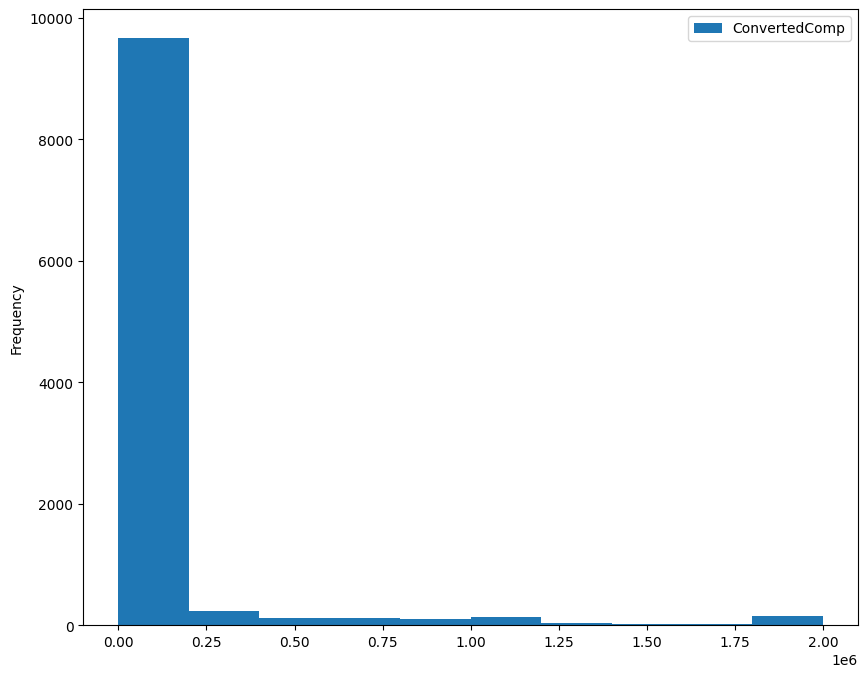

In [ ]:
df_Con.plot(kind='hist', figsize=(10, 8) )

plt.show()

### Box Plots


Plot a box plot of `Age.`


In [14]:
# your code goes here
QUERY2 = """
SELECT Age
FROM master
"""
df_age = pd.read_sql_query(QUERY1,conn)


In [15]:
print(df_age)

       ConvertedComp
0            61000.0
1            95179.0
2            90000.0
3           455352.0
4            65277.0
...              ...
11393       130000.0
11394        19880.0
11395       105000.0
11396        80371.0
11397            NaN

[11398 rows x 1 columns]


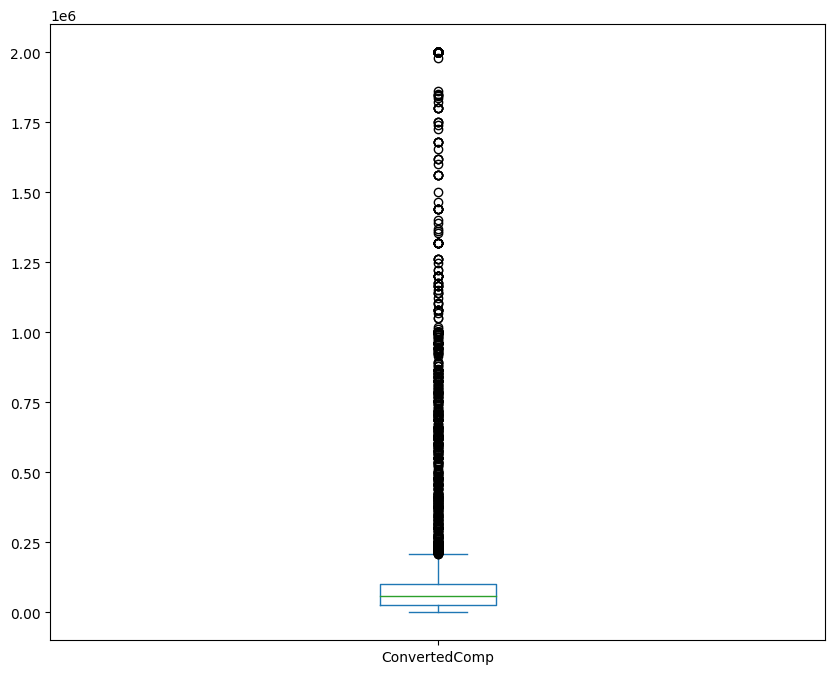

In [16]:
df_age.plot(kind='box', figsize=(10, 8) )

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


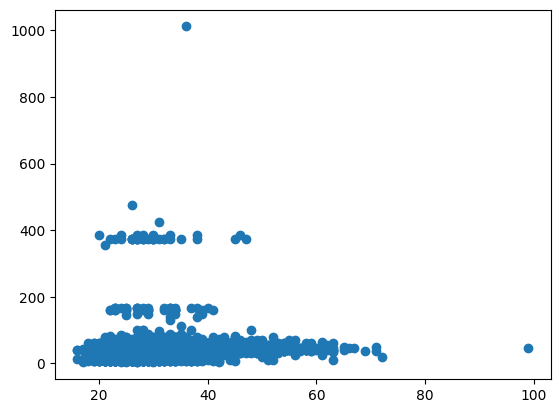

In [17]:
# your code goes here
Age = pd.read_sql_query(QUERY2, conn)
WWH = pd.read_sql_query('SELECT WorkWeekHrs FROM master', conn)

Query3 = """
SELECT Age, WorkWeekHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query3, conn)
plt.scatter(x = Age, y = WWH)
plt.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


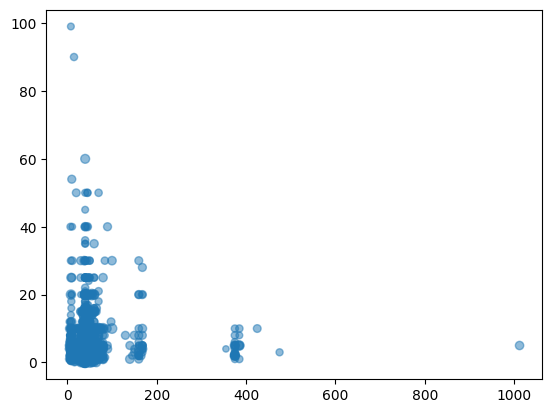

In [18]:
# your code goes here
CRH = pd.read_sql_query('SELECT CodeRevHrs FROM master', conn)

Query4 = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query4, conn)
plt.scatter(x = WWH, y = CRH, s = Age, alpha=0.5)
plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [19]:
Query5 = """
SELECT DatabaseDesireNextYear as Database, count(*) as No_of_respondents
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear 
ORDER BY No_of_respondents DESC LIMIT 5"""

db_df = pd.read_sql_query(Query5, conn)
print(db_df)

        Database  No_of_respondents
0     PostgreSQL               4328
1        MongoDB               3649
2          Redis               3331
3          MySQL               3281
4  Elasticsearch               2856


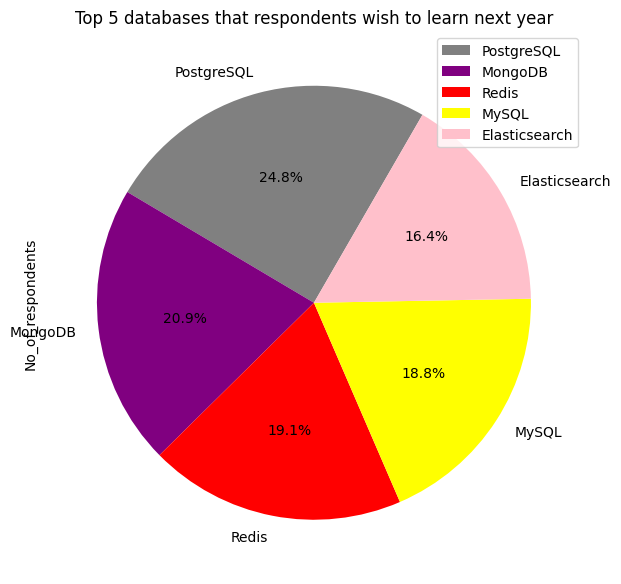

In [ ]:
db_df.plot(kind = 'pie', labels = db_df['Database'], y = 'No_of_respondents',
figsize = (7,10), #dimension of the chart window
autopct='%1.1f%%', #autopct displays percentages in pie chart. so .1f% rounds to 1 decimal place.
colors = ['grey', 'purple', 'red', 'yellow', 'pink'], #colours of the pie chart items
startangle = 60) #start Angle implies that we can rotate the pie chart according to the degree angle we specify  
plt.title('Top 5 databases that respondents wish to learn next year')

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [29]:
# your code goes here
Query6 = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""
stacked_df = pd.read_sql_query(Query6, conn)
print(stacked_df)

stacked_df.describe()



      WorkWeekHrs  CodeRevHrs   Age
0             8.0         3.0  31.0
1            40.0         2.0  34.0
2            40.0         2.0  32.0
3            42.0        15.0  34.0
4            40.0         2.0  33.0
...           ...         ...   ...
2937         42.0         4.0  32.0
2938         50.0         2.0  32.0
2939         56.0        14.0  32.0
2940         40.0         5.0  34.0
2941         80.0         1.0  30.0

[2942 rows x 3 columns]


,WorkWeekHrs,CodeRevHrs,Age
count,2917.000000,2379.000000,2942.000000
mean,42.909479,4.784443,32.210401
std,24.753388,4.135441,1.710495
min,4.000000,0.000000,30.000000
25%,40.000000,2.000000,31.000000
50%,40.000000,4.000000,32.000000
75%,42.000000,5.000000,34.000000
max,425.000000,54.000000,35.000000


In [30]:
tacked_df = stacked_df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

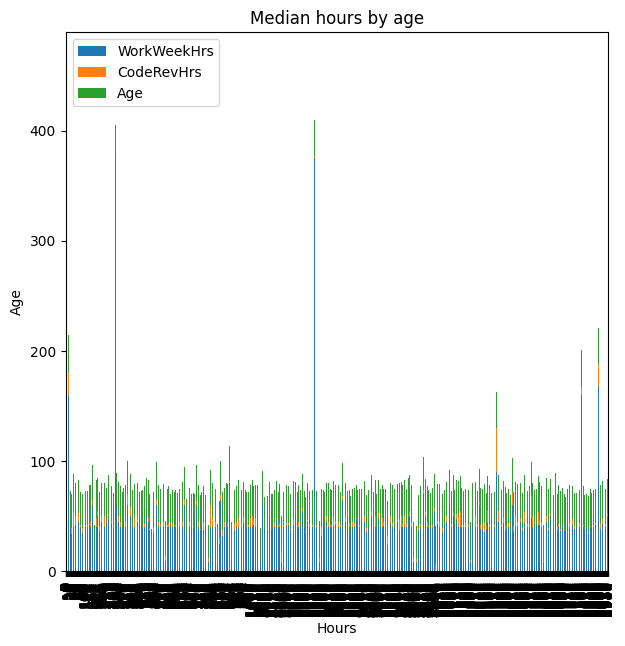

In [32]:
stacked_df.plot(kind = 'bar', stacked=True, figsize = (7,7))
plt.xlabel('Hours')
plt.ylabel('Age')
plt.title('Median hours by age')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [37]:
# your code goes here
Query7 = """SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30
"""

line_df = pd.read_sql_query(Query7, conn)
line_df.describe()



,ConvertedComp,Age
count,4.012000e+03,4317.000000
mean,1.155598e+05,27.448923
std,2.786517e+05,1.683755
min,0.000000e+00,25.000000
25%,2.199600e+04,26.000000
50%,4.950000e+04,27.000000
75%,8.483875e+04,29.000000
max,2.000000e+06,30.000000


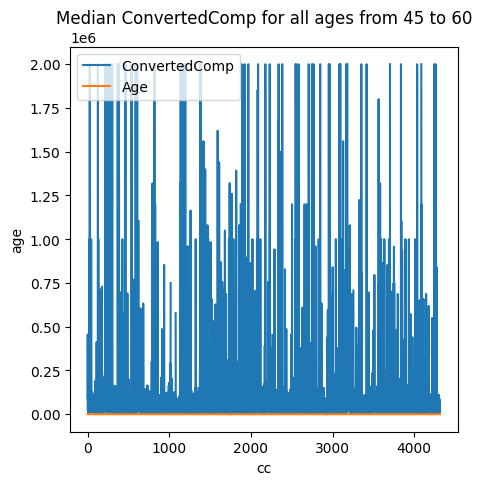

In [38]:
line_df.plot(kind = 'line', figsize = (5,5))
plt.xlabel('cc')
plt.ylabel('age')
plt.title('Median ConvertedComp for all ages from 45 to 60')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [39]:
# your code goes here
Query8 = """SELECT MainBranch, count(*) as Frequency FROM master GROUP BY MainBranch"""
bar_df = pd.read_sql_query(Query8, conn)
bar_df



,MainBranch,Frequency
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


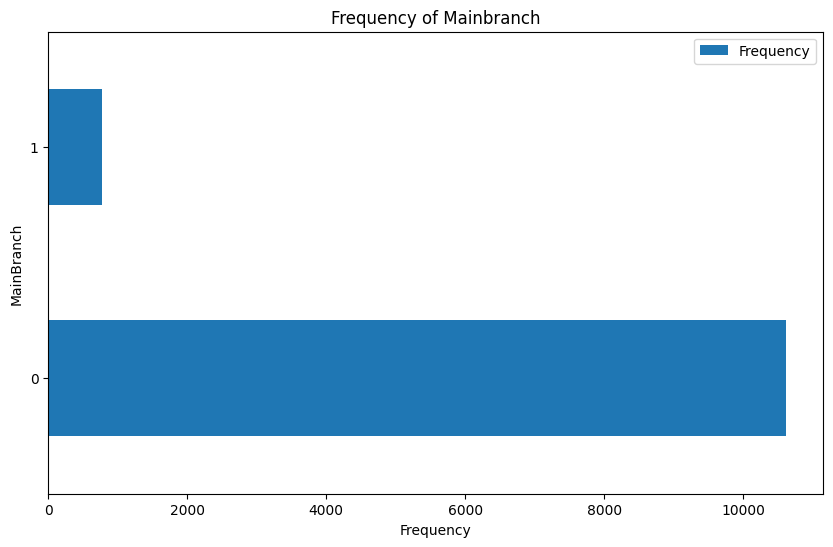

In [40]:
bar_df.plot(kind = 'barh', figsize=(10,6))
plt.xlabel('Frequency')
plt.ylabel('MainBranch')
plt.title('Frequency of Mainbranch')
plt.show()

Close the database connection.


In [41]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
